In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
df = pd.read_csv('4xmm_dr14_mos2.csv', index_col=0)
df.head()

,iauname,ra,dec,sum_flag,var_flag,mjd_start,mjd_stop,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux,m2_hr1,m2_hr2,m2_hr3,m2_hr4
detid,,,,,,,,,,,,,,,,,,
108626407010068,4XMM J000052.6-554820,0.219280,-55.805568,0,f,59144.643819,59144.964456,7.445467e-16,6.147218e-15,3.150361e-15,3.116913e-15,0.000000e+00,1.315904e-14,1.291815e-14,0.806604,-0.258358,-0.460295,-1.000000
106584004010058,4XMM J000151.5+443020,0.464808,44.505765,0,f,55578.776979,55579.143507,7.404786e-16,2.625940e-15,6.479298e-15,1.012947e-14,7.942737e-15,2.791793e-14,1.795709e-14,0.566404,0.474295,-0.264960,-0.721692
106776901390010,4XMM J020309.4-064134,30.789278,-6.692831,0,f,55776.138530,55776.262940,2.757088e-15,0.000000e+00,6.822643e-15,1.804465e-14,0.000000e+00,2.762438e-14,2.003196e-14,-1.000000,1.000000,-0.008552,-1.000000
108626407010044,4XMM J000323.0-560708,0.846042,-56.118956,0,f,59144.643819,59144.964456,7.834942e-15,1.051956e-14,5.227266e-15,1.406587e-14,1.721297e-14,5.486060e-14,2.876510e-14,0.206070,-0.272702,0.002583,-0.593591
108819008010005,4XMM J000341.1+094744,0.921503,9.795795,0,f,59581.343426,59581.709282,1.546806e-14,3.093445e-14,5.010555e-14,5.568123e-14,9.495653e-14,2.471458e-13,1.414693e-13,0.341642,0.295957,-0.415402,-0.479524


In [3]:
df.columns

Index(['iauname', 'ra', 'dec', 'sum_flag', 'var_flag', 'mjd_start', 'mjd_stop',
       'm2_1_flux', 'm2_2_flux', 'm2_3_flux', 'm2_4_flux', 'm2_5_flux',
       'm2_8_flux', 'm2_9_flux', 'm2_hr1', 'm2_hr2', 'm2_hr3', 'm2_hr4'],
      dtype='object')

In [4]:
df.describe()

,ra,dec,sum_flag,mjd_start,mjd_stop,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux,m2_hr1,m2_hr2,m2_hr3,m2_hr4
count,572900.000000,572900.000000,572900.0,572900.000000,572900.000000,5.729000e+05,5.729000e+05,5.729000e+05,5.729000e+05,5.729000e+05,5.729000e+05,5.729000e+05,572900.000000,572900.000000,572900.000000,572900.000000
mean,170.133153,-3.432797,0.0,55842.747287,55843.231807,3.036091e-15,6.752277e-15,8.195852e-15,1.253834e-14,3.504548e-14,6.556804e-14,2.750637e-14,0.383491,0.226298,-0.214288,-0.340644
std,102.734014,38.906957,0.0,2388.979243,2389.038428,2.247394e-14,7.220065e-14,4.849867e-14,6.288970e-14,2.217559e-13,3.306868e-13,1.759884e-13,0.598754,0.506043,0.502959,0.636798
min,0.000981,-88.192989,0.0,51577.464016,51577.511956,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.306921e-17,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000
25%,77.364642,-34.128450,0.0,53744.798067,53745.006840,0.000000e+00,7.132741e-16,1.395413e-15,2.058417e-15,0.000000e+00,1.199901e-14,5.481613e-15,0.075200,-0.048367,-0.549699,-1.000000
50%,175.291110,-3.287440,0.0,55957.096100,55957.374606,7.335180e-16,2.005169e-15,3.172005e-15,5.012492e-15,1.017029e-14,2.593502e-14,1.058867e-14,0.487527,0.263581,-0.275784,-0.435419
75%,255.663026,28.403423,0.0,57873.197419,57873.290486,2.338435e-15,4.877369e-15,6.771875e-15,1.079765e-14,3.172983e-14,5.610757e-14,2.147199e-14,1.000000,0.584601,0.047126,0.081030
max,359.999520,89.404105,0.0,60264.352199,60264.884618,8.505980e-12,1.893918e-11,1.262870e-11,1.111254e-11,5.174561e-11,6.212515e-11,3.899037e-11,1.000000,1.000000,1.000000,1.000000


In [5]:
df_flux_robust_scaled = df[['m2_1_flux', 'm2_2_flux', 'm2_3_flux', 'm2_4_flux', 'm2_5_flux', 'm2_8_flux', 'm2_9_flux']].copy()
df_flux_robust_scaled = RobustScaler(quantile_range=(5, 95)).fit_transform(df_flux_robust_scaled)
df_flux_robust_scaled = pd.DataFrame(df_flux_robust_scaled, columns=['m2_1_flux', 'm2_2_flux', 'm2_3_flux', 'm2_4_flux', 'm2_5_flux', 'm2_8_flux', 'm2_9_flux'])
df_flux_robust_scaled

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
0,0.001073,0.205916,-0.000912,-0.052605,-0.089989,-0.069022,0.030790
1,0.000677,0.030861,0.139405,0.142003,-0.019710,0.010713,0.097391
2,0.196804,-0.099684,0.153877,0.361660,-0.089989,0.009127,0.124815
3,0.690656,0.423281,0.086631,0.251243,0.062315,0.156270,0.240244
4,1.433022,1.438179,1.978284,1.406125,0.750208,1.195088,1.729892
...,...,...,...,...,...,...,...
572895,0.203700,0.288980,0.023597,-0.139103,0.699025,0.419313,0.068755
572896,0.434603,0.094573,-0.012465,0.000676,0.092763,0.063435,0.020444
572897,-0.071339,-0.094905,-0.085319,0.371981,0.005033,0.024120,0.012567
572898,-0.052912,-0.005538,-0.067170,-0.031234,0.032471,-0.024561,-0.060097


In [6]:
df_flux_robust_scaled.describe()

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
count,5.729000e+05,572900.000000,5.729000e+05,572900.000000,5.729000e+05,5.729000e+05,5.729000e+05
mean,2.239389e-01,0.235996,2.117589e-01,0.208852,2.201015e-01,2.141168e-01,2.236068e-01
std,2.185725e+00,3.589354,2.044255e+00,1.745273,1.962147e+00,1.786531e+00,2.326098e+00
min,-7.133900e-02,-0.099684,-1.337024e-01,-0.139103,-8.998908e-02,-1.398809e-01,-1.399539e-01
25%,-7.133900e-02,-0.064225,-7.488469e-02,-0.081980,-8.998908e-02,-7.528910e-02,-6.750165e-02
50%,-4.795106e-18,0.000000,-8.312781e-18,0.000000,-6.980028e-18,-8.523587e-18,1.042663e-17
75%,1.560877e-01,0.142787,1.517372e-01,0.160546,1.907638e-01,1.630068e-01,1.438485e-01
max,8.271859e+02,941.435401,5.321755e+02,308.248685,4.577672e+02,3.354901e+02,5.152087e+02


In [7]:
# clip the outliers
df_flux_robust_scaled = df_flux_robust_scaled.clip(lower=-1, upper=1)
df_flux_robust_scaled.describe()

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
count,5.729000e+05,572900.000000,5.729000e+05,572900.000000,5.729000e+05,5.729000e+05,5.729000e+05
mean,1.148091e-01,0.105020,1.000809e-01,0.099683,1.165460e-01,1.059176e-01,1.017924e-01
std,2.769923e-01,0.272818,2.758622e-01,0.279221,2.871717e-01,2.787791e-01,2.736338e-01
min,-7.133900e-02,-0.099684,-1.337024e-01,-0.139103,-8.998908e-02,-1.398809e-01,-1.399539e-01
25%,-7.133900e-02,-0.064225,-7.488469e-02,-0.081980,-8.998908e-02,-7.528910e-02,-6.750165e-02
50%,-4.795106e-18,0.000000,-8.312781e-18,0.000000,-6.980028e-18,-8.523587e-18,1.042663e-17
75%,1.560877e-01,0.142787,1.517372e-01,0.160546,1.907638e-01,1.630068e-01,1.438485e-01
max,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


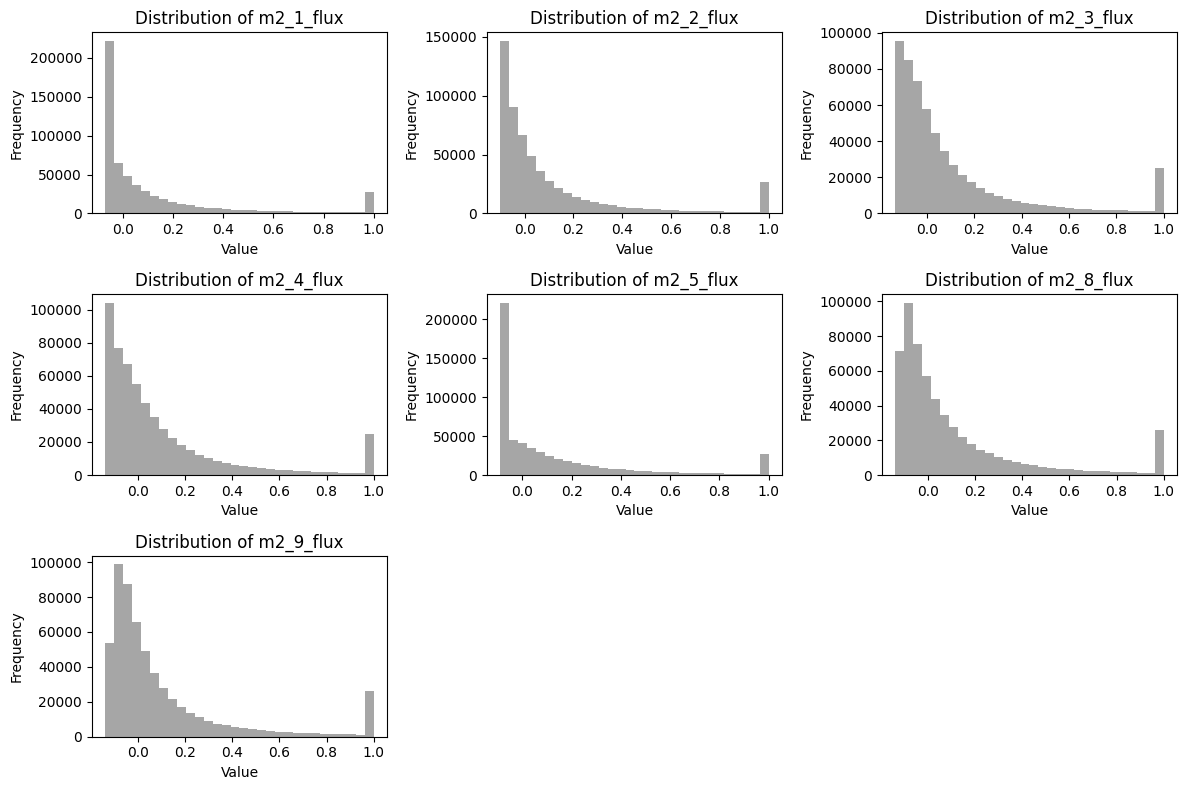

In [8]:
# plot the distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_flux_robust_scaled.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_flux_robust_scaled[col], bins=30, color='gray', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
df_features = df[[
'm2_1_flux', 'm2_2_flux', 'm2_3_flux', 'm2_4_flux', 'm2_5_flux',
'm2_8_flux', 'm2_9_flux'
]]
df_features.head()

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
detid,,,,,,,
108626407010068,7.445467e-16,6.147218e-15,3.150361e-15,3.116913e-15,0.000000e+00,1.315904e-14,1.291815e-14
106584004010058,7.404786e-16,2.625940e-15,6.479298e-15,1.012947e-14,7.942737e-15,2.791793e-14,1.795709e-14
106776901390010,2.757088e-15,0.000000e+00,6.822643e-15,1.804465e-14,0.000000e+00,2.762438e-14,2.003196e-14
108626407010044,7.834942e-15,1.051956e-14,5.227266e-15,1.406587e-14,1.721297e-14,5.486060e-14,2.876510e-14
108819008010005,1.546806e-14,3.093445e-14,5.010555e-14,5.568123e-14,9.495653e-14,2.471458e-13,1.414693e-13


In [10]:
# scaling of the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(scaled_data, columns=df_features.columns, index=df_features.index)
# PCA
pca = PCA(n_components=0.99)  # retain 99% of variance
pca.fit(df_features_scaled)
pca.explained_variance_ratio_

array([0.63824481, 0.22355934, 0.07419907, 0.0396329 , 0.01404704,
       0.01031684])

In [11]:
df_pca = pca.transform(df_features_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca.head()   

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.286156,-0.118372,-0.034962,-0.052540,0.008723,0.027222
1,-0.190715,-0.034217,-0.095611,0.008356,0.008660,0.020860
2,-0.130046,-0.028852,-0.107324,0.149386,0.046893,0.059455
3,0.036470,-0.149213,0.116528,0.135608,0.047996,0.048515
4,1.508951,-0.049403,-0.240877,0.280401,-0.076623,-0.086392


In [12]:
# interpretation of the PCA components
pca.components_
pca_components = pd.DataFrame(pca.components_, columns=df_features.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_components

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
PC1,0.323955,0.351600,0.417209,0.376341,0.295886,0.429962,0.428158
PC2,-0.399243,-0.466143,-0.128235,0.383319,0.564333,0.303621,-0.221995
PC3,0.584483,0.136120,-0.532362,-0.301280,0.401268,0.203155,-0.251763
PC4,0.608473,-0.511568,0.088176,0.470401,-0.281297,-0.156584,-0.188045
PC5,-0.035155,-0.101883,-0.643363,0.246437,-0.079334,-0.125323,0.701240
PC6,-0.140008,0.581304,-0.301000,0.561664,-0.243341,0.016893,-0.420615


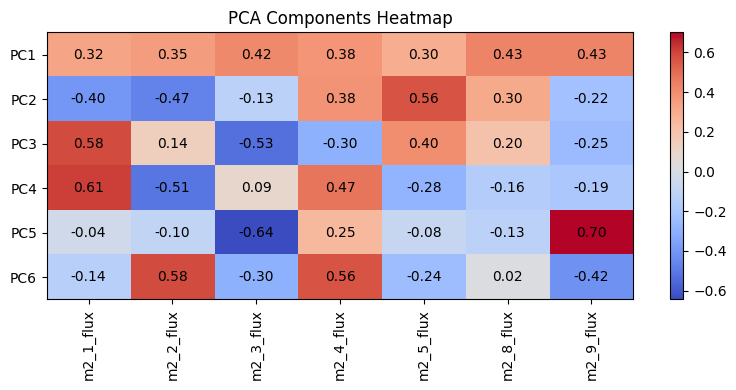

In [13]:
# visualization using a heatmap
plt.figure(figsize=(8, 4))
plt.imshow(pca_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_components.columns)), labels=pca_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_components.index)), labels=pca_components.index)
plt.title('PCA Components Heatmap')
# adding text inside the heatmap
for i in range(pca_components.shape[0]):
    for j in range(pca_components.shape[1]):
        plt.text(j, i, f'{pca_components.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

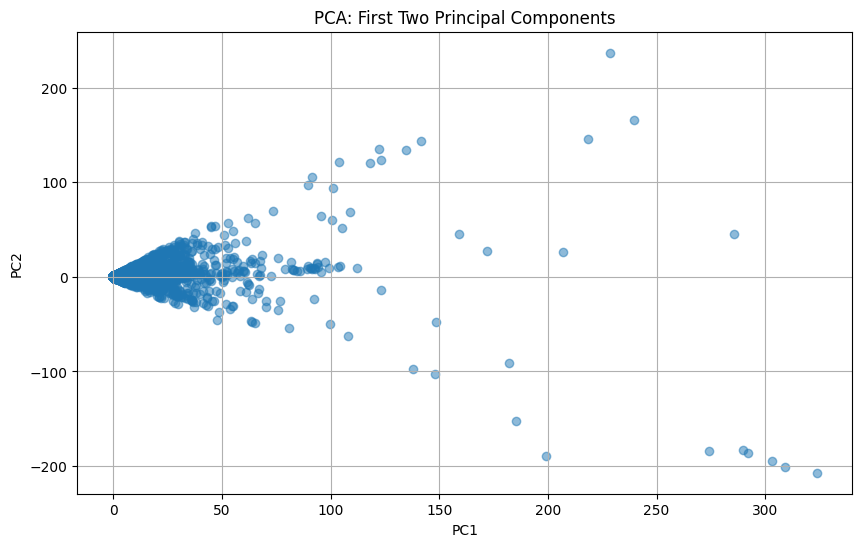

In [14]:
# scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [15]:
# create a dataframe with for each row the reconstruction errors for each PCA component
# subtract the original data from the PCA inverse transformed data
df_reconstruction = pd.DataFrame(pca.inverse_transform(df_pca.values), columns=df_features.columns, index=df_features.index)
df_reconstruction_errors = df_features_scaled - df_reconstruction

In [16]:
df_reconstruction_errors_scaled = StandardScaler().fit_transform(df_reconstruction_errors)
df_reconstruction_errors_scaled = pd.DataFrame(df_reconstruction_errors_scaled, columns=df_features.columns, index=df_features.index)
df_reconstruction_errors_scaled.head()

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
detid,,,,,,,
108626407010068,0.065179,0.065179,0.065179,0.065179,0.065179,-0.065179,0.140491
106584004010058,-0.074617,-0.074617,-0.074617,-0.074617,-0.074617,0.074617,0.050672
106776901390010,0.037387,0.037387,0.037387,0.037387,0.037387,-0.037387,-0.054118
108626407010044,0.098304,0.098304,0.098304,0.098304,0.098304,-0.098304,-0.093414
108819008010005,1.651369,1.651369,1.651369,1.651369,1.651369,-1.651369,-1.206800


In [17]:
# apply PCA to the reconstruction errors
pca_reconstruction_errors = PCA(n_components=0.99)
pca_reconstruction_errors.fit(df_reconstruction_errors_scaled.values)
pca_reconstruction_errors.explained_variance_ratio_

array([0.86048891, 0.13951109])

In [18]:
# interpret the PCA components of the reconstruction errors
pca_reconstruction_errors.components_
# create a DataFrame for the PCA components of the reconstruction errors
pca_reconstruction_errors_components = pd.DataFrame(pca_reconstruction_errors.components_,
                                                   columns=df_reconstruction_errors_scaled.columns,
                                                   index=[f'PC{i+1}' for i in range(pca_reconstruction_errors.n_components_)])
pca_reconstruction_errors_components

,m2_1_flux,m2_2_flux,m2_3_flux,m2_4_flux,m2_5_flux,m2_8_flux,m2_9_flux
PC1,-0.407300,-0.407300,-0.407300,-0.407300,-0.407300,0.407300,0.068125
PC2,0.027812,0.027812,0.027812,0.027812,0.027812,-0.027812,0.997677


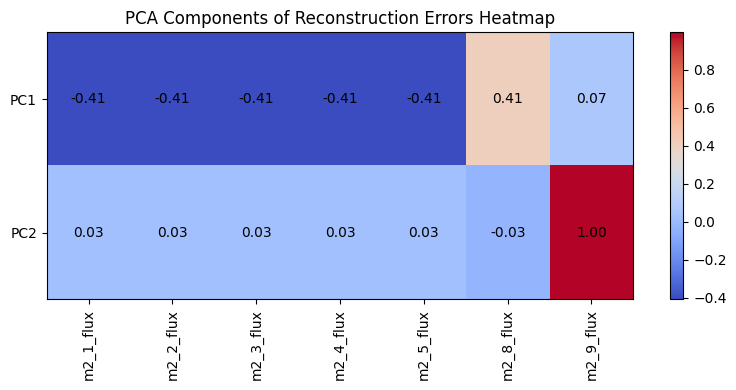

In [19]:
# visualize it using a heatmap
plt.figure(figsize=(8, 4))
plt.imshow(pca_reconstruction_errors_components, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(pca_reconstruction_errors_components.columns)), labels=pca_reconstruction_errors_components.columns, rotation=90)
plt.yticks(ticks=np.arange(len(pca_reconstruction_errors_components.index)), labels=pca_reconstruction_errors_components.index)
plt.title('PCA Components of Reconstruction Errors Heatmap')
plt.tight_layout()
# adding text inside the heatmap
for i in range(pca_reconstruction_errors_components.shape[0]):
    for j in range(pca_reconstruction_errors_components.shape[1]):
        plt.text(j, i, f'{pca_reconstruction_errors_components.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

In [20]:
df_pca_reconstruction_errors = pca_reconstruction_errors.transform(df_reconstruction_errors_scaled.values)
df_pca_reconstruction_errors = pd.DataFrame(df_pca_reconstruction_errors,
                                            columns=[f'PC{i+1}' for i in range(df_pca_reconstruction_errors.shape[1])],
                                            index=df_reconstruction_errors_scaled.index)
df_pca_reconstruction_errors

,PC1,PC2
detid,,
108626407010068,-0.149715,0.151041
106584004010058,0.185801,0.038103
106776901390010,-0.095053,-0.047753
108626407010044,-0.246598,-0.076792
108819008010005,-4.117828,-0.928431
...,...,...
106553401470013,0.057808,0.136871
106732701010017,0.630016,0.007770
107237808010033,0.331325,-0.001844


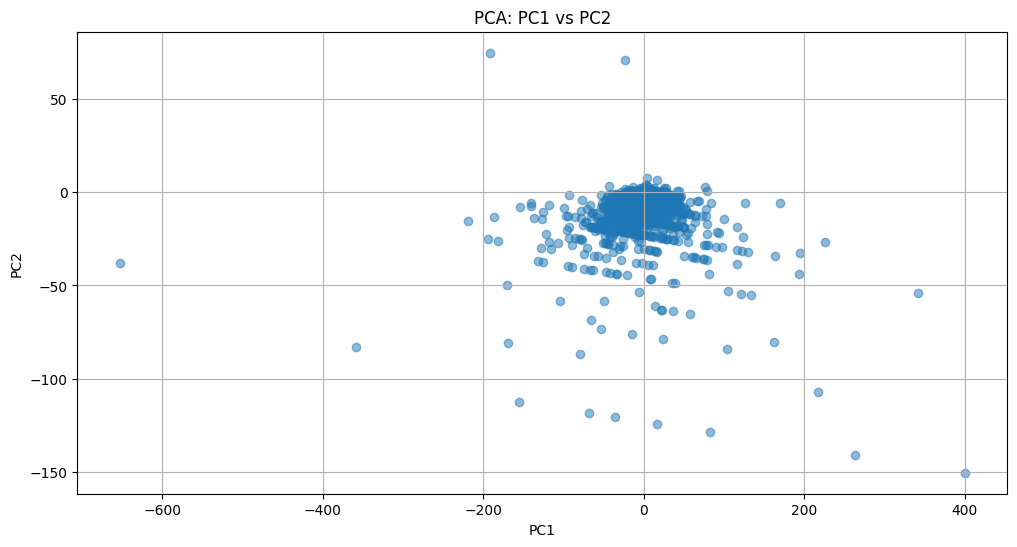

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,)
plt.title('PCA: PC1 vs PC2') # almost 99% of the variance!
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

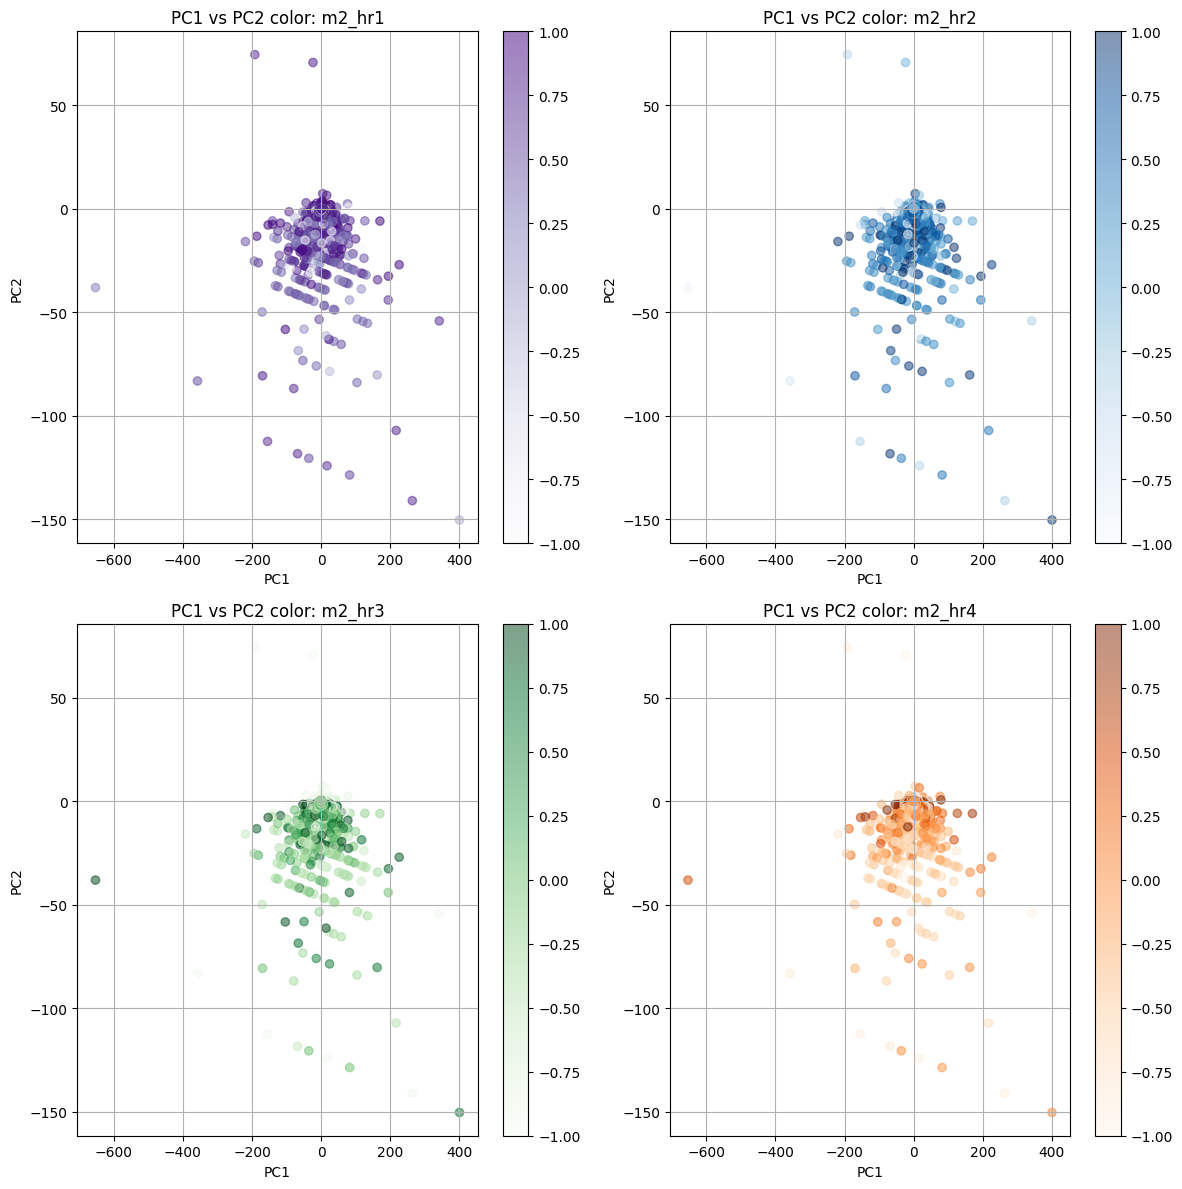

In [22]:
# creating 4 plots with hardness ratio colouring (for PCA1 vs PCA2)
#'m2_hr1' colouring
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m2_hr1'], cmap='Purples')
plt.title('PC1 vs PC2 color: m2_hr1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_hr2' colouring
plt.subplot(2, 2, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m2_hr2'], cmap='Blues')
plt.title('PC1 vs PC2 color: m2_hr2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_hr3' colouring
plt.subplot(2, 2, 3)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m2_hr3'], cmap='Greens')
plt.title('PC1 vs PC2 color: m2_hr3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_hr4' colouring
plt.subplot(2, 2, 4)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df['m2_hr4'], cmap='Oranges')
plt.title('PC1 vs PC2 color: m2_hr4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
plt.tight_layout()
# shows the color scale
plt.show()

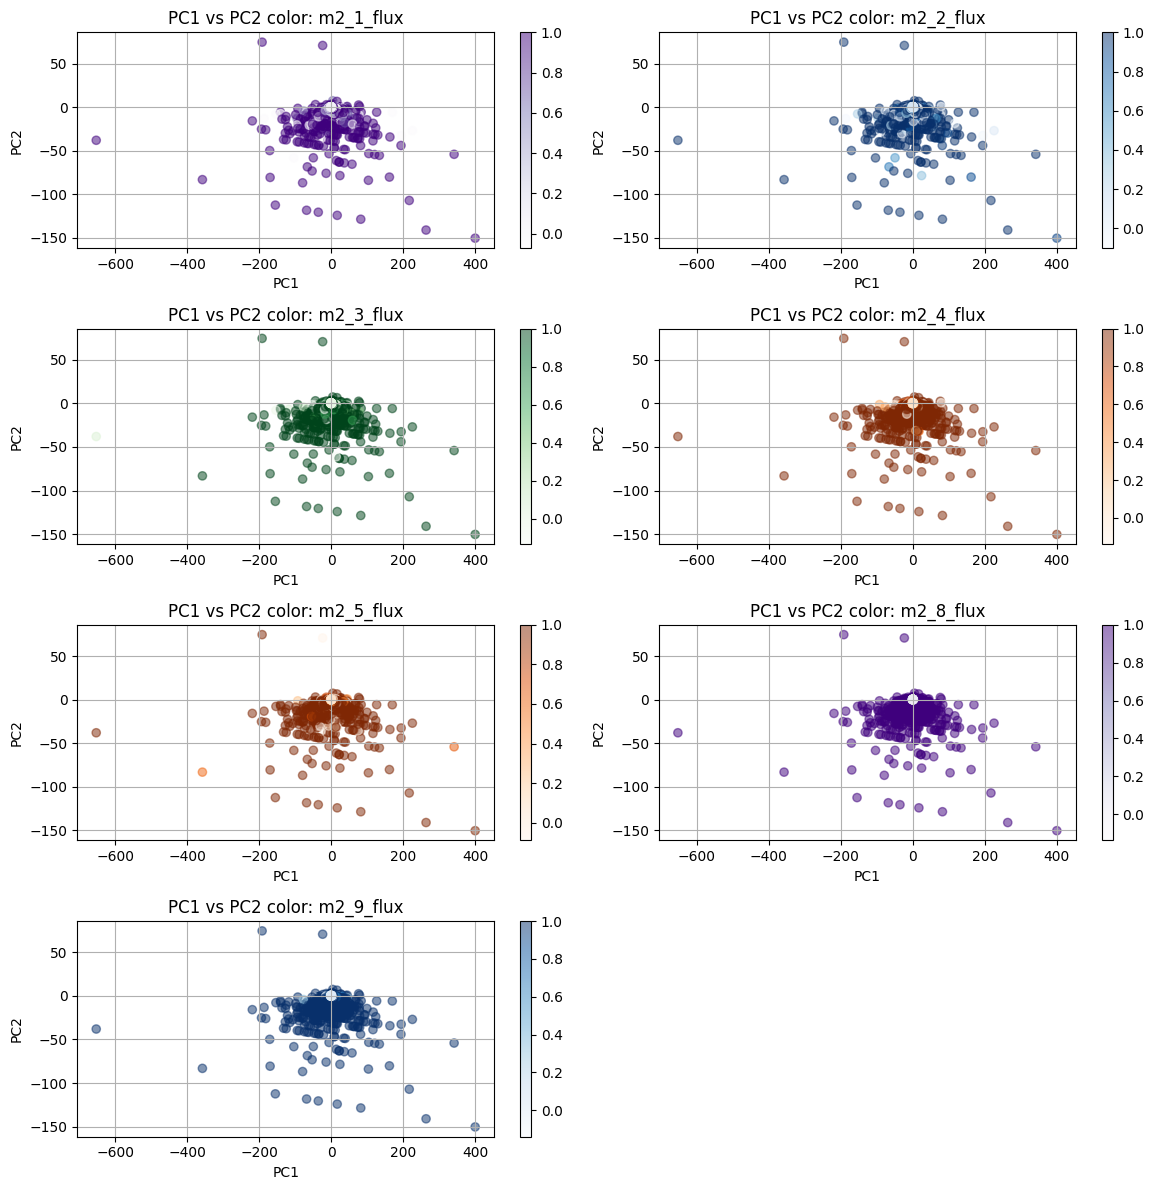

In [23]:
# creating 7 plots with fluxes as colouring (for PCA1 vs PCA2)
#'m2_flux' colouring
plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_1_flux'], cmap='Purples')
plt.title('PC1 vs PC2 color: m2_1_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_2_flux' colouring
plt.subplot(4, 2, 2)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_2_flux'], cmap='Blues')
plt.title('PC1 vs PC2 color: m2_2_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_3_flux' colouring
plt.subplot(4, 2, 3)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_3_flux'], cmap='Greens')
plt.title('PC1 vs PC2 color: m2_3_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_4_flux' colouring
plt.subplot(4, 2, 4)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_4_flux'], cmap='Oranges')
plt.title('PC1 vs PC2 color: m2_4_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_5_flux' colouring
plt.subplot(4, 2, 5)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_5_flux'], cmap='Oranges')
plt.title('PC1 vs PC2 color: m2_5_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_8_flux' colouring
plt.subplot(4, 2, 6)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_8_flux'], cmap='Purples')
plt.title('PC1 vs PC2 color: m2_8_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
# 'm2_9_flux' colouring
plt.subplot(4, 2, 7)
plt.scatter(df_pca_reconstruction_errors['PC1'], df_pca_reconstruction_errors['PC2'], alpha=0.5,
            c=df_flux_robust_scaled['m2_9_flux'], cmap='Blues')
plt.title('PC1 vs PC2 color: m2_9_flux')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.colorbar()
plt.tight_layout()
# shows the color scale
plt.show()